In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
#import scipy as sp
import scipy.integrate as integrate
import scipy.constants as constants
from scipy.integrate import odeint
from scipy import linalg
import sympy as sym
from scipy.optimize import fmin
import time
%matplotlib inline
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (15.0, 6.0)
plt.rcParams['font.size'] = 16
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

for i in range(6):
    print("Starte mit Aufgabe %i nach spätestens %i Minuten!"% (i+1, 120/6*i))

Starte mit Aufgabe 1 nach spätestens 0 Minuten!
Starte mit Aufgabe 2 nach spätestens 20 Minuten!
Starte mit Aufgabe 3 nach spätestens 40 Minuten!
Starte mit Aufgabe 4 nach spätestens 60 Minuten!
Starte mit Aufgabe 5 nach spätestens 80 Minuten!
Starte mit Aufgabe 6 nach spätestens 100 Minuten!


## Aufgabe 3: Nullstellen

In [2]:
f = lambda x:(3 / x - 1) * np.sin(x) / 1 - 3 * np.cos(x) / x**2

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in multiply
  """Entry point for launching an IPython kernel.


(-1, 1)

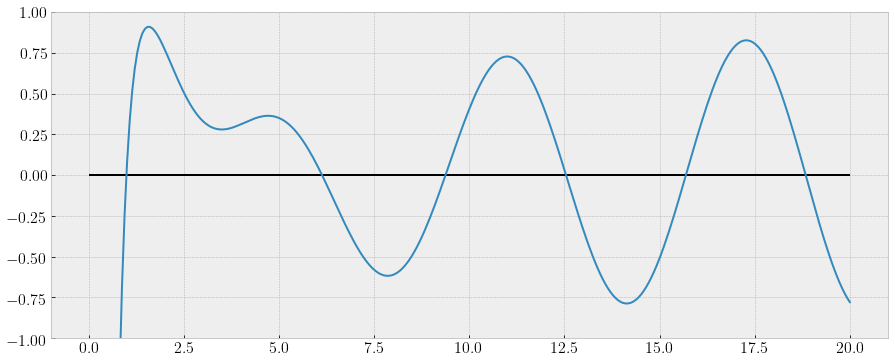

In [9]:
x = np.linspace(0,20,300)
plt.plot(x, f(x))
plt.hlines(0, 0, 20)
plt.ylim(-1,1)

0.986084
6.127954
9.374634
12.541275
15.692871


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in multiply
  """Entry point for launching an IPython kernel.


(-1, 1)

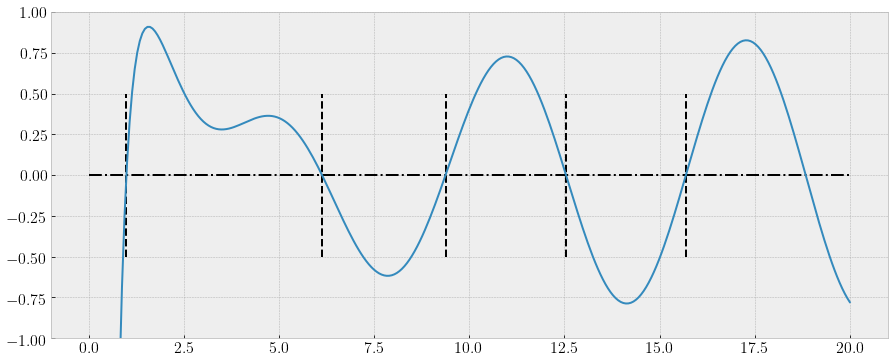

In [34]:
grobe_schätzung = [1, 6, 9, 12.5, 16]
nullstellen = [] 
for x_0 in grobe_schätzung:
    nullstellen.append(fmin(lambda x: abs(f(x)), x_0, disp=0))
for i in nullstellen:
    print("%.6f"%i[0])
plt.plot(x, f(x))
plt.vlines(nullstellen, -.5, .5, linestyles = "--")
plt.hlines(0,0,20, linestyles="-.")
plt.ylim(-1,1)

## Aufgabe 5: Bewegungsgleichung
$x'' = -x^3$

$x(0) =1$

$x'(0) = 0$

$T = 2 π$
gesucht: $x(T)$ und $x'(T)$

Zum Zeitpunkt t = 2.0pi ergibt sich für x 0.506 und für x' 0.683


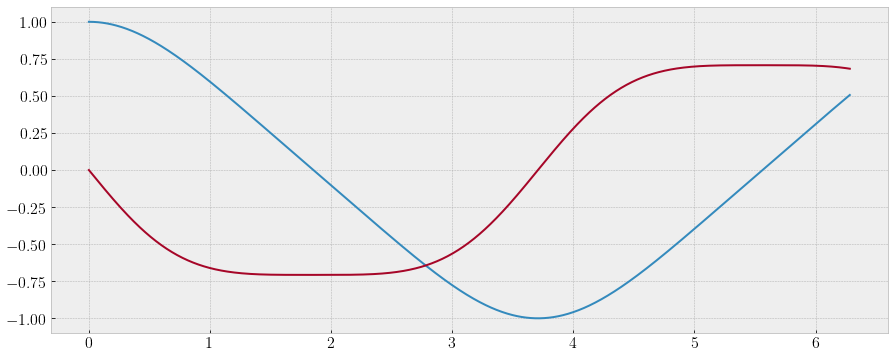

In [47]:
def dgl(y, t):
    x, x_ = y
    return [x_, -x**3]
t = np.linspace(0, 2 * np.pi, 1000)
lösung = odeint(dgl, [1,0], t)
plt.plot(t, lösung)
print(r"Zum Zeitpunkt t = %.1fpi ergibt sich für x %.3f und für x' %.3f" %(t[-1]/np.pi, lösung[-1,0], lösung[-1,1]) )

## Aufgabe 6: Energieeigenzustände:

In [86]:
def dif2_matrix(x, dx):
    dif_now = np.diag(np.ones(len(x))) * -2
    dif_pre_ones =  np.ones(len(x)-1)
    dif_pre = np.diag(dif_pre_ones, k=-1)
    dif_post_ones = np.ones(len(x)-1)
    dif_post = np.diag(dif_post_ones, k=1)     
    dif  =  dif_now + dif_pre + dif_post
    dif /= dx**2
    return dif


def potential(x):
    V_matrix = np.eye(len(x))
    for i in range(len(x)):
        V_matrix[i,i] *=  V(x[i])
    return V_matrix

V = lambda x: -10 / (1 + x**2)
x = np.linspace(-6,6, 300)
dx = x[1] - x[0]
d2_m = dif2_matrix(x, dx)

H = d2_m + potential(x)
#H = potential(x)
ew, ev = linalg.eigh(H)

In [87]:
ew.shape, ev.shape

((300,), (300, 300))

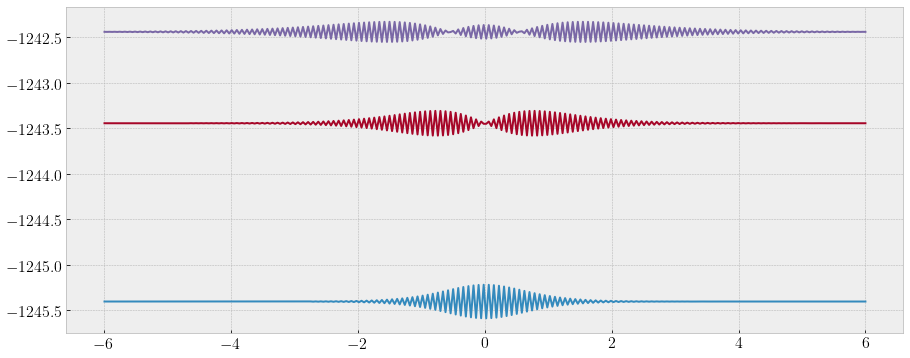

In [88]:
hmax = 3
for i in range(hmax):
    plt.plot(x, 1/2 *ew[i] + ev[:,i])
#plt.plot(x, V(x))

In [89]:
"""Berechnung von Eigenwerten und Eigenfunktionen der 1D Schroedingergleichung.
"""

import numpy as np
from scipy.linalg import eigh
from matplotlib import pyplot as plt


def diskretisierung(xmin, xmax, N):
    """Berechne die quantenmechanisch korrekte Ortsdiskretisierung.

    Parameter:
        xmin: unteres Ende des Bereiches
        xmax: oberes Ende des Bereiches
        N: Anzahl der Diskretisierungspunkte
    Rueckgabe:
        x: Array mit diskretisierten Ortspunkten
    """
    delta_x = (xmax - xmin)/(N + 1.0)                      # Ortsgitterabstand
    x = np.linspace(xmin + delta_x, xmax - delta_x, N)     # Ortsgitterpunkte
    return x


def diagonalisierung(hquer, x, V):
    """Berechne sortierte Eigenwerte und zugehoerige Eigenfunktionen.

    Parameter:
        hquer: effektives hquer
        x: Ortspunkte
        V: Potentialwerte an x
    Rueckgabe:
        ew: sortierte Eigenwerte (Array der Laenge N)
        ef: entsprechende Eigenvektoren, ef[:, i] (Groesse N*N)
    """
    delta_x = x[1] - x[0]
    N = len(x)
    z = hquer**2/(2.0*delta_x**2)                          # Nebendiagonalelem.
    h = (np.diag(V + 2.0*z) +
         np.diag(-z*np.ones(N - 1), -1) +                  # Matrix-Darstellung
         np.diag(-z*np.ones(N - 1), 1))                    # Hamilton-Operat.

    ew, ef = eigh(h)                                       # Diagonalisierung
    ef = ef/np.sqrt(delta_x)                               # WS-Normierung
    return ew, ef


def plot_eigenfunktionen(ax, ew, ef, x, V, width=1, Emax=0.1, fak=0.01,
                         betragsquadrat=False, basislinie=True, alpha=1,
                         title=None):
    """Darstellung der Eigenfunktionen.

    Dargestellt werden die niedrigsten Eigenfunktionen 'ef' im Potential 'V(x)'
    auf Hoehe der Eigenwerte 'ew' in den Plotbereich 'ax'.

    Optionale Parameter:
        width: (mit Default-Wert 1) gibt die Linienstaerke beim Plot der
            Eigenfunktionen an. width kann auch ein Array von Linienstaerken
            sein mit einem spezifischen Wert fuer jede Eigenfunktion.
        Emax: (mit Default-Wert 1/10) legt die Energieobergrenze
            fuer den Plot fest.
        fak: ist ein Skalierungsfaktor fuer die graphische Darstellung
            der Eigenfunktionen.
        betragsquadrat: gibt an, ob das Betragsquadrat der Eigenfunktion oder
            die (reelle!) Eigenfunktion selbst dargestellt wird.
        basislinie: gibt an, ob auf Hoehe der jeweiligen Eigenenergie eine
            gestrichelte graue Linie gezeichnet wird.
        alpha: gibt die Transparenz beim Plot der Eigenfunktionen an (siehe
            auch Matplotlib Dokumentation von plot()). alpha kann auch ein
            Array von Transparenzwerten sein mit einem spezifischen Wert
            fuer jede Eigenfunktion.
        title: Titel fuer den Plot.
    """
    if title is None:
        title = "Asymm. Doppelmuldenpotential"

    plt.axes(ax)                                      # Ortsraumplotfenster
    plt.setp(ax, autoscale_on=False)
    plt.axis([np.min(x), np.max(x), np.min(V), Emax])
    plt.xlabel(r'$x$')
    plt.title(title)

    plt.plot(x, V, linewidth=2, color='0.7')          # Potential plotten
    anz = np.sum(ew <= Emax)                          # Zahl zu plottenden Ef

    if basislinie:                                    # Plot Basislinie bei Ew
        for i in np.arange(anz):
            plt.plot(x, ew[i] + np.zeros(len(x)), ls='--', color='0.7')

    try:                                              # Verhaelt sich width
        iter(width)                                   # wie ein array?
    except TypeError:                                 # Falls `width` skalar:
        width = width * np.ones(anz)                  # konst. Linienstaerke

    try:                                              # entsprechend fuer
        iter(alpha)                                   # Transparenz alpha
    except TypeError:
        alpha = alpha * np.ones(anz)

    colors = ['b', 'g', 'r', 'c', 'm', 'y']           # feste Farbreihenfolge
    if betragsquadrat:                                # Plot Betragsquadr. Efkt
        plt.ylabel(r'$V(x)\ \rm{,\ \|Efkt.\|^{2}\ bei\ EW}$')
        for i in np.arange(anz):
            plt.plot(x, ew[i] + fak*np.abs(ef[:, i])**2, linewidth=width[i],
                     color=colors[i % len(colors)], alpha=alpha[i])
    else:                                             # Plot Efkt
        plt.ylabel(r'$V(x)\ \rm{,\ Efkt.\ bei\ EW}$')
        for i in np.arange(anz):
            plt.plot(x, ew[i] + fak*ef[:, i], linewidth=width[i],
                     color=colors[i % len(colors)], alpha=alpha[i])


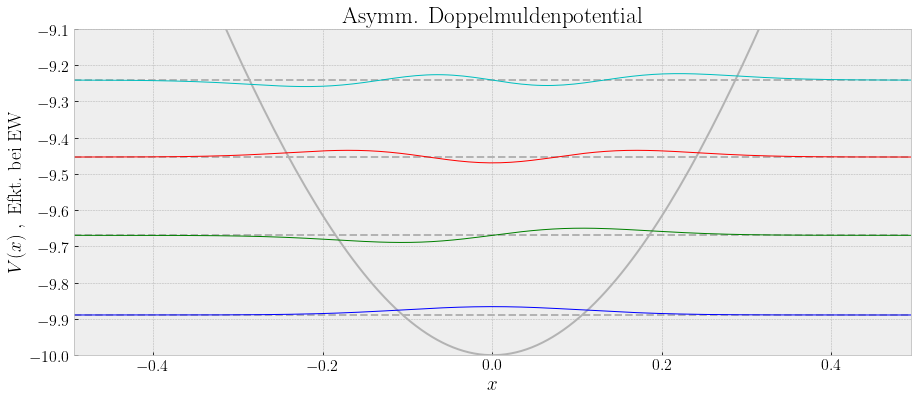

In [97]:
#def potential(x, A):
#    """Potentialfunktion fuer die asymmetrische Doppelmulde mit Parameter A."""
#    return x**4 - x**2 + A*x
potential = lambda x, A: -10 / (1 + x**2)

asym = 0.04                              # Potentialparameter
L = 0.5                                  # x-Bereich ist [-L,L]
N = 160                                  # Zahl der Gitterpunkte
hquer = 0.05                             # effektives hquer


x_disk = diskretisierung(-L, L, N)    # Ortsdiskretisierung
V = potential(x_disk, asym)              # Potential

# Eigenfunktionen berechnen
ew, ef = diagonalisierung(hquer, x_disk, V)

for i in range(4):
    print()
# Eigenfunktionen plotten
ax = plt.subplot(111)
plot_eigenfunktionen(ax, ew, ef, x_disk, V, Emax= -9.1)
